## Objetivos de este Notebook

* Explicar cómo consultar la información de un conjunto de datos determinado.
* Presentar un caso de uso para la información publicada en SIMEM.
* Demostrar cómo hacer filtros especializados en un conjunto de datos determinado.

**Caso de uso - Comportamiento precio de bolsa y precio escasez**  
Se presentarán los precios de bolsa y escasez de activación en un rango de tiempo elegido.

### Carga del objeto PyDataSimem

En la siguiente celda se importa el objeto PyDataSimem, que contiene el método para consultar los conjuntos de datos de SiMEM

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..\src'))
from pydatasimem import PyDataSimem

### Importación de librerías


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

### Consultar información de un conjunto de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Los conjuntos a presentar serán [precio de bolsa horario](https://www.simem.co/datadetail/ec694552-8887-481d-8152-8055b36db8a1) y [precio de escasez](https://www.simem.co/datadetail/ae3f2310-154d-4391-b17c-081a83bc6e0f) desde Abril 2023 hasta Abril 2024.

Se definen los parámetros de entrada y se crea el objeto para realizar las consultas.

In [4]:
p_bolsa_id = 'EC6945'
p_escasez_id = 'ae3f23'
fecha_inicial = '2023-04-01'
fecha_final = '2024-04-30'
simem = PyDataSimem()

La función main contiene todo el proceso para transportar la información del dataset entre el rango de fechas solicitadas a un dataframe. Después de este paso, el proceso es de manipulación y visualización de datos.

In [5]:
p_bolsa_df = simem.main(p_bolsa_id, fecha_inicial, fecha_final)
p_escasez_df = simem.main(p_escasez_id, fecha_inicial, fecha_final)

In [6]:
display(p_bolsa_df.sort_values(by='FechaHora').head())
display(p_escasez_df.sort_values(by='Fecha').head())

,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor
2375,PB_Tie,2023-04-01 00:00:00,PT1H,COP/kWh,TX5,153.865082
2351,PB_Nal,2023-04-01 00:00:00,PT1H,COP/kWh,TX5,158.333267
2327,PB_Int,2023-04-01 00:00:00,PT1H,COP/kWh,TX5,153.865082
2304,PB_Int,2023-04-01 01:00:00,PT1H,COP/kWh,TX5,120.820076
2352,PB_Tie,2023-04-01 01:00:00,PT1H,COP/kWh,TX5,120.820076


,CodigoVariable,Fecha,CodigoDuracion,Valor
38,PrecioEscasez,2023-04-01,P1M,810.450012
37,PrecioMarginalEscasez,2023-04-01,P1M,1150.969971
36,PrecioEscasezActivacion,2023-04-01,P1M,1150.969971
35,PrecioEscasez,2023-05-01,P1M,831.830017
34,PrecioMarginalEscasez,2023-05-01,P1M,1214.270020


### Interpretación de conjuntos de datos
Cada conjunto de datos tiene diferentes variables, las cuales se encuentran en la sección **ver detalle de variable** de cada conjunto de datos, donde también se pueden ver las características de las columnas que constituyen el conjunto.

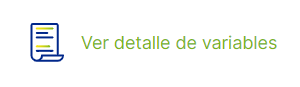

De precio de bolsa horario se utiliza el precio de bolsa nacional (PB_Nal).  
De precio de escasez se utiliza el precio de escasez de activación (PrecioEscasezActivacion).  


In [7]:
filtro_bolsa = 'PB_Nal'
filtro_escasez = 'PrecioEscasezActivacion'

Los dataframes se filtaran para tener los datos necesarios para la visualización, eligiendo el código de variable y de una vez organizando por fecha.

In [8]:
p_bolsa_df_filtrado: pd.DataFrame = p_bolsa_df[p_bolsa_df['CodigoVariable'] == filtro_bolsa].copy().sort_values('FechaHora').reset_index()
p_escasez_df_filtrado: pd.DataFrame = p_escasez_df[p_escasez_df['CodigoVariable'] == filtro_escasez].copy().sort_values('Fecha').reset_index()


### Manipulación de datos
El siguiente paso es seleccionar solamente la información realmente importante para el análisis. Los pasos a realizar para preparar la información son:
- La columna fecha se define como fecha.
- Se calcula el promedio por día para precio de bolsa.
- Se eligen las columnas a graficar.

In [9]:
p_bolsa_df_filtrado['Fecha'] = pd.to_datetime(p_bolsa_df_filtrado['FechaHora'], format='%Y-%m-%d %H:%M:%S').dt.date
p_bolsa_df_filtrado = p_bolsa_df_filtrado[['Fecha', 'Valor']].groupby('Fecha').mean().reset_index()
p_bolsa_df_filtrado

,Fecha,Valor
0,2023-04-01,150.070435
1,2023-04-02,154.212596
2,2023-04-03,147.311000
3,2023-04-04,150.312663
4,2023-04-05,144.655930
...,...,...
391,2024-04-26,213.617797
392,2024-04-27,158.639282
393,2024-04-28,105.223137
394,2024-04-29,134.575885


In [10]:
p_escasez_df_filtrado['Fecha'] = pd.to_datetime(p_escasez_df_filtrado['Fecha'], format='%Y-%m-%d')
p_escasez_df_filtrado = p_escasez_df_filtrado[['Fecha', 'Valor']]
p_escasez_df_filtrado

,Fecha,Valor
0,2023-04-01,1150.969971
1,2023-05-01,1214.270020
2,2023-06-01,1137.339966
3,2023-07-01,958.849976
4,2023-08-01,975.190002
5,2023-09-01,1064.939941
6,2023-10-01,1066.650024
7,2023-11-01,1081.250000
8,2023-12-01,1144.040039
9,2024-01-01,1045.079956


### Gráfica de precios en el tiempo
Ahora se realiza la presentación visual de los datos del comportamiento de los precios de bolsa y escasez de activación desde Abril 2023 a Abril 2024.

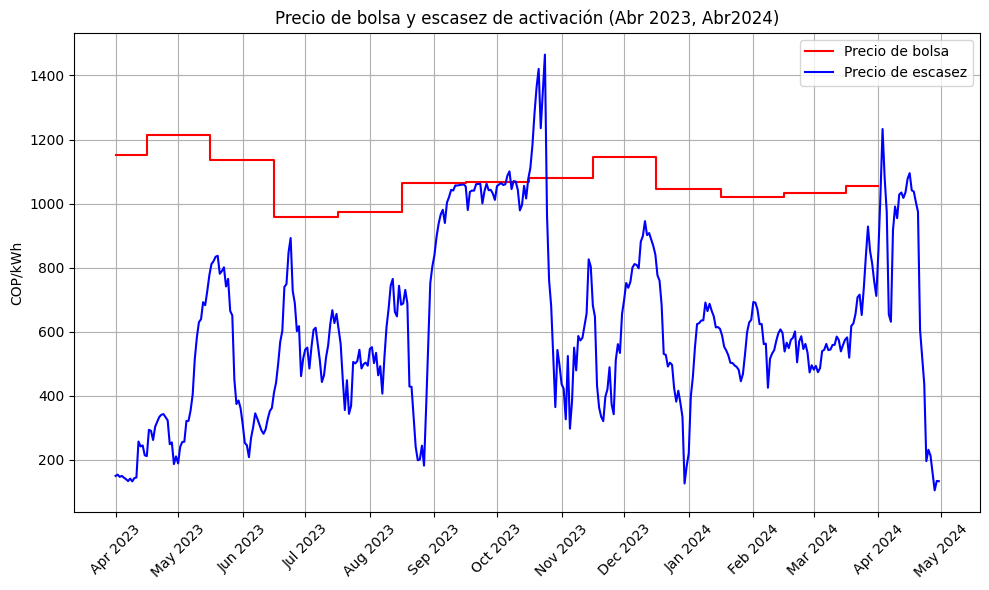

In [12]:
x_axis = 'Fecha'
y_axis = 'Valor'

def graficar_precios() -> None:

    plt.figure(figsize=(10, 6))

    plt.step(p_escasez_df_filtrado[x_axis], p_escasez_df_filtrado[y_axis],where='mid', 
            label='Precio de bolsa', color='red')
    plt.plot(p_bolsa_df_filtrado[x_axis], p_bolsa_df_filtrado[y_axis], 
            label='Precio de escasez', color='blue')

    plt.ylabel('COP/kWh')
    plt.title('Precio de bolsa y escasez de activación (Abr 2023, Abr2024)')
    plt.legend()
    plt.grid(True)

    plt.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(mpl_dates.MonthLocator())

    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
    return None

graficar_precios()